In [23]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
path = "C:\\Users\\UKGC-PC\\Documents\\metal-mario-master\\IndividualProject\\toGraph"
sys.path.append(path)


episode_rewards = []
behaviours = ['r','ra','rab','c']

def read_data(button):
    experiment_rewards = [ [] for i in range(501)]
    avg_training_x = [0 for i in range(8)]
    best_x = [0 for i in range(8)]
    episode_number = 500
    std_x = []
    std = []
    seven = []
    max_r,min_r = 0,0
    exp = 0
    c = 0
    with open (path +"\\{}.csv".format(button)) as f:
        for line in f:
            
            if line != "\n":
            
                stats = line.split(",")
               
                experiment_rewards[int(stats[1])].append(float(stats[3]))
                
                if (float(stats[3]) > max_r):
                    max_r = float(stats[3])
                if (float(stats[3]) < min_r):
                    min_r = float(stats[3])
                if (int(stats[4])> best_x[c]):
                    best_x[c] = int(stats[4])
                avg_training_x[c] += int(stats[4])
                std.append(int(stats[4]))
                
            else:
                std_x.append(std)
                std = []
                
                c+=1
            if (int(stats[0])==7):
                std_x.append(std)
        
                
    for i in range(len(avg_training_x)):
        avg_training_x[i] = round(avg_training_x[i] / 500,2)
    
    std_out = []
    for i in std_x:
        std_out.append(np.std(i))
        
        
    ## print average, standard deviation pairs
    for i in range(len(avg_training_x)):
        print(i,round(avg_training_x[i],2),round(std_out[i],2))
    
    
    
    return experiment_rewards, max_r, min_r,episode_number
    
e_r, max_r, min_r, e_n = read_data('r')





0 680.27 324.49
1 687.0 322.62
2 675.54 328.3
3 667.19 322.4
4 675.54 328.3
5 687.08 327.21
6 702.6 332.63
7 682.44 313.03


In [24]:
import numpy as np
def manipulate_data(experiment_rewards,episode_numbers):
    
    std = []
    mean = []
   
    for ep_r in experiment_rewards:
        std.append(np.std(ep_r))
        mean.append(np.mean(ep_r))

   
    return std, mean


r_std,r_mean = manipulate_data(e_r,e_n)

C:\Users\UKGC-PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


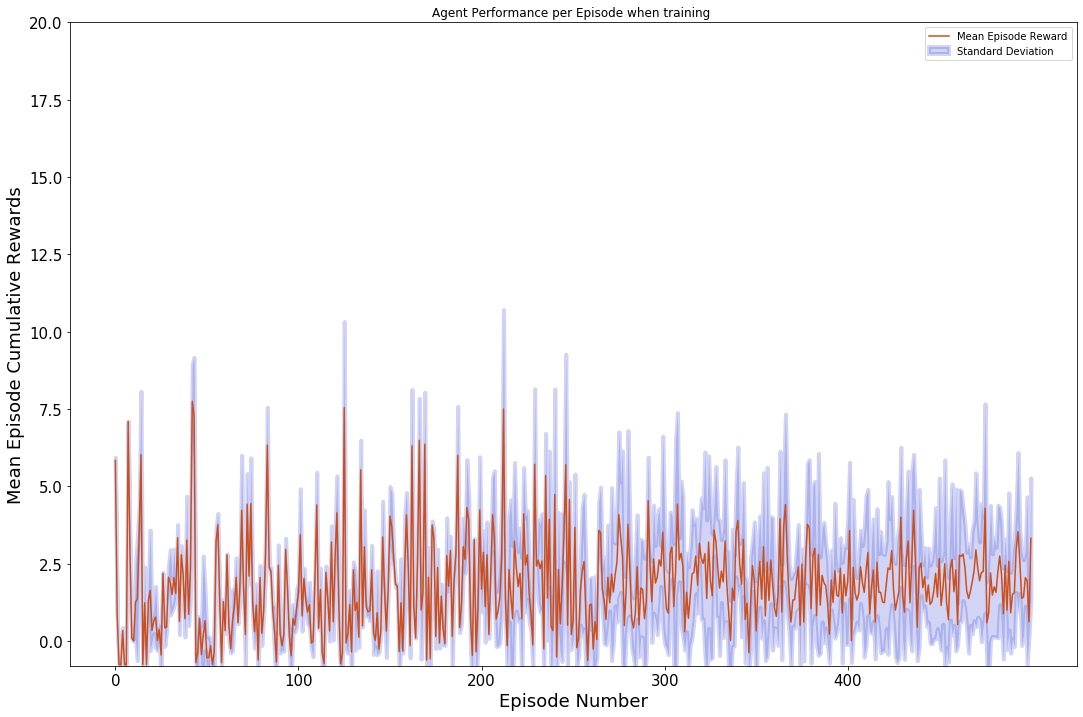

In [25]:
def plot(std,mean,button,en):
    std_min =[]
    std_max = []
    for i in range(len(std)):
        
        std_min.append(mean[i] - std[i])
        std_max.append(mean[i] + std[i])
    
    
    plt.figure(figsize=(15,10))
    plt.plot(mean,color='#CC4F1B',label="Mean Episode Reward")
    axes = plt.axes()
    axes.set_ylim([-0.8,20])
    plt.ylabel('Mean Episode Cumulative Rewards',fontsize=18)
    plt.xlabel('Episode Number',fontsize=18)
    plt.xticks(np.arange(0,500,step=100))
    
    plt.fill_between(range(len(mean)),std_min,std_max,alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC',linewidth=4,label="Standard Deviation")#, antialiased=True)
    plt.title('Agent Performance per Episode when training ')
    plt.tight_layout()
    plt.legend()
    plt.tick_params(labelsize=15)
    plt.show()


plot(r_std,r_mean,'rab',e_n) 